# K-Nearest Neightbors (KNN) Multiclass Classificiation of Iris

Species map
- 'setosa': 0, 
- 'versicolor': 0, 
- 'virginica': 0,

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
%matplotlib inline

In [163]:
iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [164]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [165]:
iris = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris['Species'] = iris_dataset.target

In [166]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [167]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [168]:
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

Target variable is balanced

In [169]:
iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [170]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


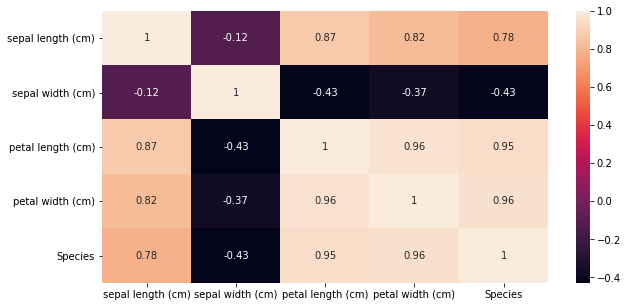

In [171]:
plt.figure(figsize=(10,5))
sns.heatmap(iris.corr(),annot=True)
plt.show()

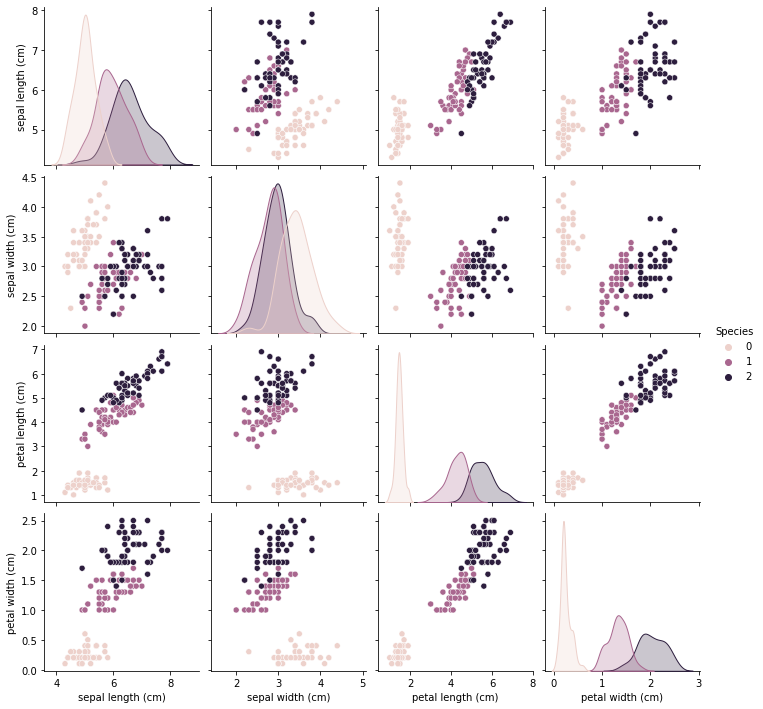

In [172]:
sns.pairplot(iris, hue='Species')

#### Scaling the features:

Scaling is an important step for Classification especially for KNN. Because any variable on the larger scale, has a larger effect on the distance between observations. The classifier does not need to be scaled. 

In [173]:
#declaring variables
X = iris.drop('Species', axis=1)
y = iris['Species']

In [174]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_sc = scaler.fit_transform(X)
X = pd.DataFrame(X_sc, columns=X.columns)

In [175]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
from sklearn.neighbors import KNeighborsClassifier

# Fitting KNN classifier to the Training set
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)

# Predicting the Test set probabilities and classes
y_pred = KNN.predict(X_test)

In [177]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#accuracy score
accuracy_score = accuracy_score(y_test, y_pred)
print('Accuracy Score: {}'.format(accuracy_score))

#confusion matrix
print(confusion_matrix(y_test, y_pred))

#classification report
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9666666666666667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



**Choosing K**

In [178]:
#Cross Validation
from sklearn.model_selection import cross_val_score

error_rate = []
k=30

for i in range(1,k):
    KNN = KNeighborsClassifier(n_neighbors=i)
    acc = cross_val_score(estimator=KNN, X=X_train, y=y_train, cv=5 ,scoring='accuracy')
    err_rate = 1-acc
    error_rate.append(np.mean(err_rate))

df_error_rate = pd.Series(error_rate, index=range(1,k))

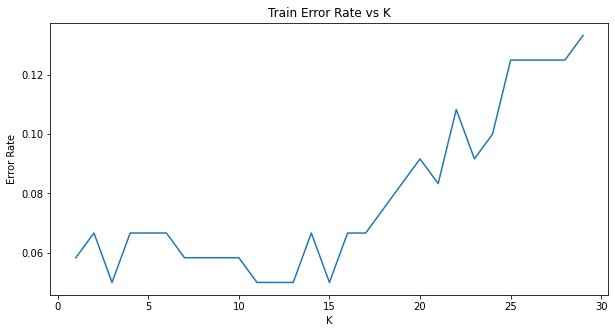

In [179]:
plt.figure(figsize=(10,5))
plt.plot(range(1,k), error_rate)
plt.title('Train Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [180]:
optimal_k = df_error_rate.idxmin()

print('Optimal k: {}'.format(optimal_k))

Optimal k: 3


In [181]:
#Optimal KNN model
KNN = KNeighborsClassifier(n_neighbors=optimal_k)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

In [182]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#accuracy score
accuracy_score = accuracy_score(y_test, y_pred)
print('Accuracy Score: {}'.format(accuracy_score))

#confusion matrix
print(confusion_matrix(y_test, y_pred))

#classification report
print(classification_report(y_test, y_pred))

Accuracy Score: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Although the accuracy score, precision, recall, f1-score are all 1.0. The model can use more observations than 150. 